# Lab 2 - kNN and Bias-Variance Tradeoff

- Your name: Tran Cong Tran Cong Tuan Manh

- Your student code: 19133035

# I. Hướng dẫn

## 1. Minh họa bias-variance tradeoff với k-NN cho hồi quy

### 1.1. Tìm hiểu tổng quan về dữ liệu

Phần này sẽ dùng tập dữ liệu `boston` trong thư viện `sklearn.datasets` để minh họa.

#### 1.1.1. Load dữ liệu

In [15]:
!pip install scikit-learn
!pip install sklearn

In [17]:

from sklearn import datasets

boston = datasets.load_boston()

#### 1.1.2. Khám phá tổng quan về dữ liệu

In [18]:
dir(boston)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [19]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [20]:
X = boston.data
y = boston.target

print('Number of instances:', len(y))

Number of instances: 506


### 1.2. Chia dữ liệu

Ta sẽ chia dữ liệu làm 2 tập train và test với tỷ lệ 70/30.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

print('Labels counts in y:', len(y))
print('Labels counts in y_train:', len(y_train))
print('Labels counts in y_test:', len(y_test))

Labels counts in y: 506
Labels counts in y_train: 354
Labels counts in y_test: 152


### 1.3. Fit mô hình và trực quan hóa kết quả

Phần này ta sẽ đánh giá và vẽ biểu đồ kết quả của mô hình k-NN trên tập test với $k \in \{ 1, 5, 10, 15, 20, 25, 30 \}$ dùng độ đo `mean squared error (MSE)`.

Text(0, 0.5, 'MSE')

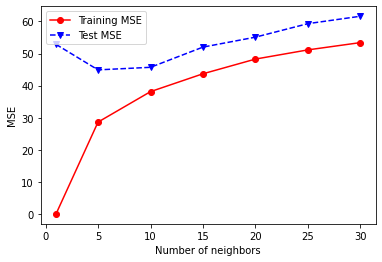

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainMSE = []
testMSE = []

for k in numNeighbors:
    reg = KNeighborsRegressor(n_neighbors=k, metric='minkowski', p=2)
    reg.fit(X_train, y_train)
    y_predTrain = reg.predict(X_train)
    y_predTest = reg.predict(X_test)
    trainMSE.append(mean_squared_error(y_train, y_predTrain))
    testMSE.append(mean_squared_error(y_test, y_predTest))

plt.plot(numNeighbors, trainMSE, 'ro-', numNeighbors, testMSE,'bv--')
plt.legend(['Training MSE','Test MSE'])
plt.xlabel('Number of neighbors')
plt.ylabel('MSE')

**Nhận xét**

- Khi $k = 1$ mô hình cho kết quả (MSE) trên tập train rất tốt nhưng kết quả trên tập test khá cao. Mô hình có dấu hiệu overfitting.

- Khi tăng $k$ lên ($k \in \{5, 10 \}$) kết quả trên tập train tăng lên nhưng kết quả trên tập test lại giảm xuống (so với $k = 1$). Do đó, miền giá trị $k \in [5, 10]$ có khả năng là miền giá trị mà mô hình cho kết quả tốt (good fit). 

- Khi tăng $k$ lên nữa ($k \in \{15, 20, 25, 30\}$) kết quả trên tập train tăng lên và kết quả trên tập test có khuynh hướng tăng lên. Do đó, miền giá trị $k \in [15, 30]$ nhiều khả năng là miền giá trị mà mô hình bị underfitting.

# II. Bài tập

## Bài tập 1. Áp dụng thuật toán k-NN

Cho dữ liệu huấn luyện (training data) như bảng bên dưới:

| $x_1$ | $x_2$ | $y$ |
|-------|-------|-----|
|   1   |  0.5  |  1  |
|   2   |   1   |  1  |
|  2.5  |   2   |  1  |
|   3   |   2   |  1  |
|  1.5  |   2   | -1  |
|  2.5  |   3   | -1  |
|   1   |   2   | -1  |
|   1   |   1   | -1  |

Ta muốn sử dụng tập dữ liệu huấn luyện ở trên để đưa ra dự đoán, $\hat{y}$, cho điểm dữ liệu kiểm tra không được gắn nhãn $x = (2.5, 1)$ sử dụng thuật toán k-NN.

1. Tính khoảng cách Eucledian giữa mỗi quan sát và điểm kiểm tra, $x = (2.5, 1)$ (tạo thêm cột $d$  mô tả khoảng cách giữa các điểm dữ liệu trong tập huấn luyện với điểm kiểm tra, $x = (2.5, 1)$, và điền giá trị vào cột này). Xuất kết quả ra như bảng bên dưới (giá trị cột $d$ là khoảng cách tính được).

Tham khảo thêm về thư viện `numpy` ở: https://cs231n.github.io/python-numpy-tutorial/

**Trả lời**

1.a. Định nghĩa hàm tính khoảng cách Eucledian theo công thức sau:

$$d(u, v) = \sqrt{\sum_{i = 1}^{n} (u_i - v_i)^2}$$

In [23]:
import math
def EuclideanDistance(u, v):
    '''
        Calculate the Eucledian distance of vector u and v
    '''
    ## BEGIN YOUR CODE
    n = len(u)
    s = 0.0
    for i in range(n):
        t = u[i] - v[i]
        s += t * t
    
    return math.sqrt(s)
    ## END YOUR CODE

u = (1, 2, 3)
v = (4, 2, 7)
print("EuclideanDistance(u, v) = ", EuclideanDistance(u, v))

EuclideanDistance(u, v) =  5.0


1.b. Tính khoảng cách Eucledian giữa mỗi quan sát và điểm kiểm tra, 𝑥=(2.5,1)

In [32]:
import numpy as np

x = np.array([2.5, 1])

X = np.array([[1, 0.5],
              [2, 1],
              [2.5, 2],
              [3, 2],
              [1.5, 2],
              [2.5, 3],
              [1, 2],
              [1, 1]])
y = np.array(['1','1','1','1','-1','-1','-1','-1'])

for d in X:
    distance = EuclideanDistance(x, d)
    print("d: ",distance)


d:  1.5811388300841898
d:  0.5
d:  1.0
d:  1.118033988749895
d:  1.4142135623730951
d:  2.0
d:  1.8027756377319946
d:  1.5


| $x_1$ | $x_2$ | $y$ | $d$ |
|-------|-------|-----|-----|
|   1   |  0.5  |  1  |     |
|   2   |   1   |  1  |     |
|  2.5  |   2   |  1  |     |
|   3   |   2   |  1  |     |
|  1.5  |   2   | -1  |     |
|  2.5  |   3   | -1  |     |
|   1   |   2   | -1  |     |
|   1   |   1   | -1  |     |

2. Cho biết dự đoán của thuật toán $k$-NN cho $x = (2.5, 1)$ khi $k = 1$? Tại sao?

**Trả lời**

Viết câu trả lời của bạn ở đây.

3. Cho biết dự đoán của thuật toán $k$-NN cho $x = (2.5, 1)$ khi $k = 3$? Tại sao?

**Trả lời**

Viết câu trả lời của bạn ở đây.

## Bài tập 2: Hiện thực thuật toán k-NN

Ở bài tập này, bạn sẽ tự hiện thực thuật toán 1-NN (k = 1). Sau đó, bạn sẽ thử nghiệm thuật toán với tập dữ liệu `iris` từ thư viện `sklearn.datasets`. Phần bên dưới là các đoạn mã làm mẫu có một số chỗ còn chừa trống để bạn viết thêm vào.

### 2.1. Load và khám phá tổng quan về dữ liệu

In [33]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
print(iris.DESCR)
X = iris.data
y = iris.target

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### 2.2. Xáo trộn ngẫu nhiên và chia dữ liệu

In [35]:
# Shuffle the data
np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, y = X[shuffle], y[shuffle]

# Split data into train and test set
train_data, train_labels = X[:100], y[:100]
test_data, test_labels = X[100:], y[100:]

### 2.3. Định nghĩa lớp NearestNeighborClassifier

Để đơn giản, bạn chỉ cần cài đặt thuật toán k-NN cho bài toán phân loại với k = 1. 

In [81]:
class NearestNeighborClassifier:
    # Constructor
    def __init__(self, metric = EuclideanDistance, k = 1):
        self.metric = metric
        self.k = k
    
    # No training for Nearest Neighbors, just store the data
    def fit(self, train_data, train_labels):
        self.train_data = train_data
        self.train_labels = train_labels
    
    # Make predictions for each test instance and return results
    def predict(self, test_data):
        results = []
        for instance in test_data:
            results.append(self._predict_instance(instance))
        return results
    
    # Private function for making a single prediction
    def _predict_instance(self, instance):
        t=[]
        for i in self.train_data:
            t.append(EuclideanDistance(instance,i))
        min = 0
        for j in range (len(t)):
            if (t[j]<t[min]):
                min=j
        
        return self.train_labels[min]

### 2.4. Thử nghiệm NearestNeighborClassifier

In [82]:
nn = NearestNeighborClassifier()
nn.fit(train_data, train_labels)
preds = nn.predict(test_data)

total = len(preds)
correct = 0
for pred, label in zip(preds, test_labels):
    if pred == label: correct += 1

print("total: %d, correct: %d" %(total, correct))

total: 50, correct: 49


## Bài tập 3. Minh họa bias-variance tradeoff với k-NN cho phân loại

### 3.1. Chia dữ liệu
Ta sẽ tiếp tục dùng tập dữ liệu `iris` từ thư viện `sklearn.datasets` cho các yêu cầu bên dưới.

Chia dữ liệu thành 2 tập train và test với tỷ lệ 80/20. Sử dụng thêm tham số `stratify` để đảm bảo phân bố lớp (giá trị của thuộc tính $y$) trên tập train và tập test là xấp xỉ bằng nhau. In ra số lượng phần tử của tập train và tập test.

Tham khảo: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [69]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dataset = load_iris()
iris_data = dataset.data
iris_target = dataset.target

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_target,
                                                    stratify = iris_target, 
                                                    test_size = 0.2)

### 3.2 Chuẩn hóa dữ liệu

Sử dụng lớp `StandardScaler` của thư viện `sklearn.preprocessing` để chuẩn hóa dữ liệu trên tập train và tập test.

Tham khảo: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [78]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

object= StandardScaler()
# standardization 
X_train = object.fit_transform(X_train)
X_test = object.fit_transform(X_test)
#y_train = object.fit_transform(y_train)
#y_test = object.fit_transform(y_test)
#print(scale)


### 3.3. Fit mô hình và trực quan hóa kết quả

Đánh giá và vẽ biểu đồ kết quả của mô hình k-NN trên tập test với $k \in \{ 1, 5, 10, 15, 20, 25, 30 \}$ dùng độ đo `Accuracy`.

Tham khảo: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Text(0, 0.5, 'Accuracy')

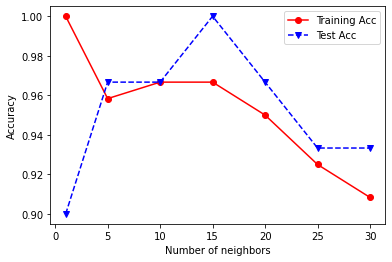

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
Acc_train = []
Acc_test = []

for k in numNeighbors:
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(X_train, y_train)
  
    x_train_predict = knn_model.predict(X_train)
    x_test_predict = knn_model.predict(X_test)

    Acc_train.append(accuracy_score(y_train, x_train_predict))
    Acc_test.append(accuracy_score(y_test, x_test_predict))

plt.plot(numNeighbors, Acc_train, 'ro-', numNeighbors, Acc_test,'bv--')
plt.legend(['Training Acc','Test Acc'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

**Nhận xét**

- 

- 

- 


## Bài tập 4. Chẩn đoán bias-variance dùng learning curves

### 4.1. Vẽ learning curves
Sử dụng tập train và test của tập dữ liệu `iris` ở bước 2.3 của bài tập 2, hãy vẽ learning curves cho mô hình k-NN (k = 5).

Tham khảo: https://scikit-learn.org/stable/modules/learning_curve.html

Text(0, 0.5, 'Accuracy')

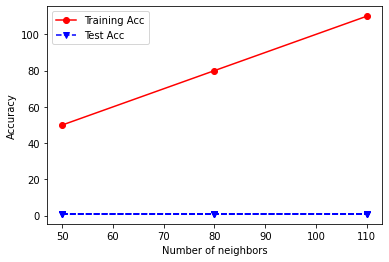

In [92]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

train_sizes, train_scores, valid_scores = learning_curve(SVC(kernel='linear'), X, y, train_sizes=[50, 80, 110], cv=5)

plt.plot(train_sizes, train_sizes, 'ro-', train_sizes, valid_scores,'bv--')
plt.legend(['Training Acc','Test Acc'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

### 4.2. Chuẩn đoán bias-variance dùng learning curves

Dựa vào learning curves vẽ được ở câu 3.1, hãy chuẩn đoán xem mô hình có đang bị bias hay variance hay cả hai? Giải thích?

**Trả lời**

Viết câu trả lời của bạn ở đây.